<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.3.1
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features.

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classification problems. These transforms are called *kernels*.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
breast_cancer_csv = '../DATA/breast-cancer-wisconsin-data.csv'
breast_cancer = pd.read_csv(breast_cancer_csv, index_col='id')

### 2. EDA

- Explore dataset. Clean data (if required)
- Find features to predict class

NB: Exploration in Lab 5.1.1, not repeated here

In [5]:
breast_cancer.drop(columns='Unnamed: 32', inplace=True)
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map({'M': 1, 'B': 0})

In [18]:
def print_model_metrics(conf, acc, c_report):
    print('Confusion matrix:')
    print(conf)
    print()
    print(f'Accuracy: {acc}')
    print()
    print('Classification report:')
    print(c_report)

In [13]:
def confusion_df(confusion_matrix):
    return pd.DataFrame(
        confusion_matrix,
        columns=['predicted_healthy', 'predicted_cancer'],
        index=['is_healthy', 'is_cancer']
    )

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

Confusion matrix:
            predicted_healthy  predicted_cancer
is_healthy                 86                 2
is_cancer                   5                50

Accuracy: 0.951048951048951

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        88
           1       0.96      0.91      0.93        55

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



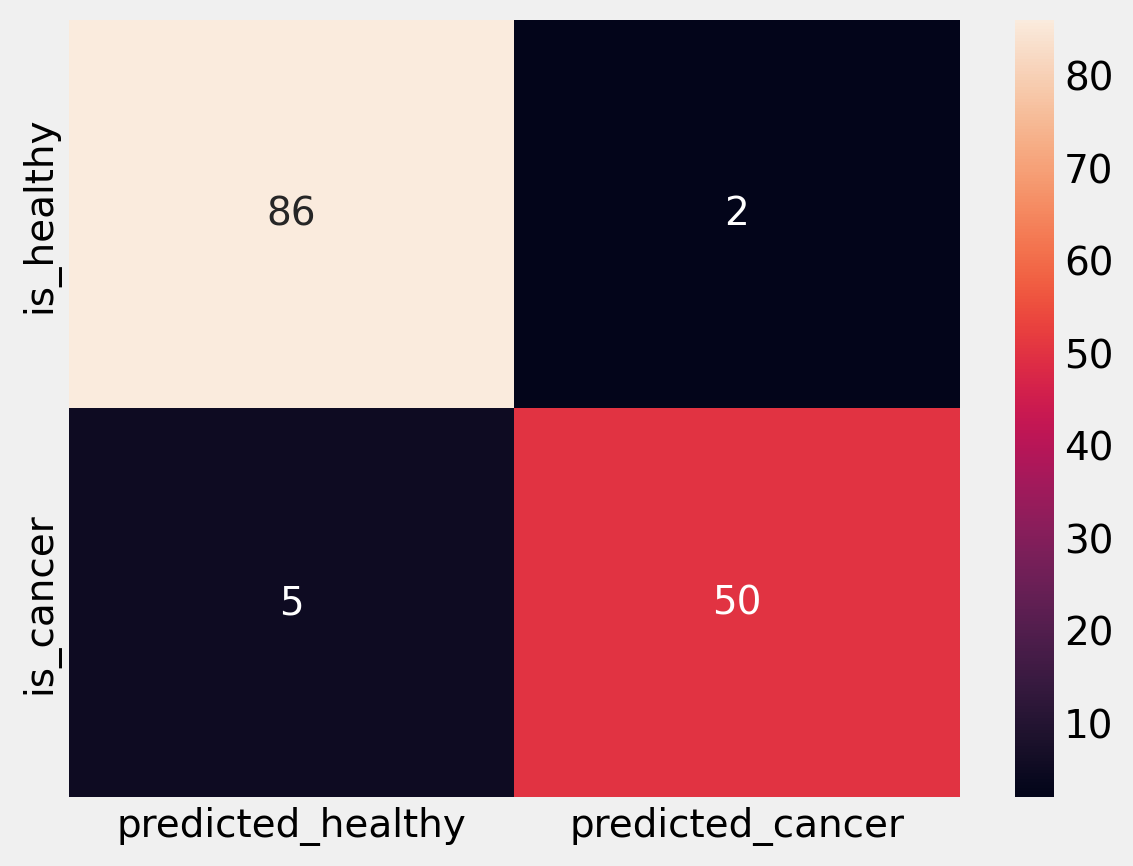

In [36]:
target_col = "diagnosis"
y = breast_cancer[target_col]
X = breast_cancer[[col for col in breast_cancer.columns if col != target_col]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

logreg = LogisticRegression(solver='liblinear', max_iter=100000)
logreg.fit(X_train, y_train)

logreg_pred = logreg.predict(X_test)

logreg_confusion = confusion_df(metrics.confusion_matrix(y_test, logreg_pred))
logreg_accuracy = metrics.accuracy_score(y_test, logreg_pred)
logreg_classification_report = metrics.classification_report(y_test, logreg_pred)

print_model_metrics(conf=logreg_confusion, acc=logreg_accuracy, c_report=logreg_classification_report)
sns.heatmap(logreg_confusion,annot=True,fmt="d");



### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

Confusion matrix:
            predicted_healthy  predicted_cancer
is_healthy                 85                 3
is_cancer                   5                50

Accuracy: 0.9440559440559441

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        88
           1       0.94      0.91      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



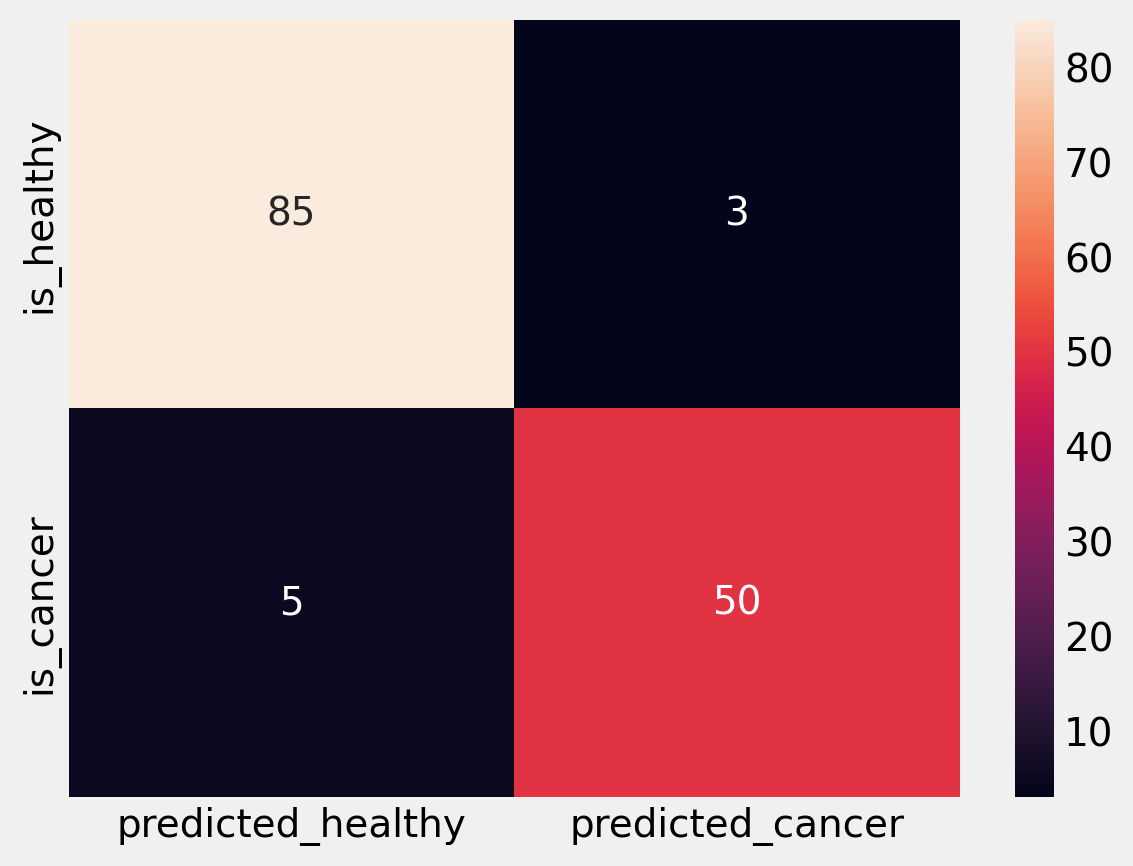

In [51]:
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

svm_confusion = confusion_df(metrics.confusion_matrix(y_test, svm_pred))
svm_accuracy = metrics.accuracy_score(y_test, svm_pred)
svm_classification_report = metrics.classification_report(y_test, svm_pred)

print_model_metrics(svm_confusion, svm_accuracy, svm_classification_report)

sns.heatmap(svm_confusion,annot=True,fmt="d");

### 5. Naive Bayes
#### 5.1 Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

Confusion matrix:
            predicted_healthy  predicted_cancer
is_healthy                 85                 3
is_cancer                   5                50

Accuracy: 0.9440559440559441

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        88
           1       0.94      0.91      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



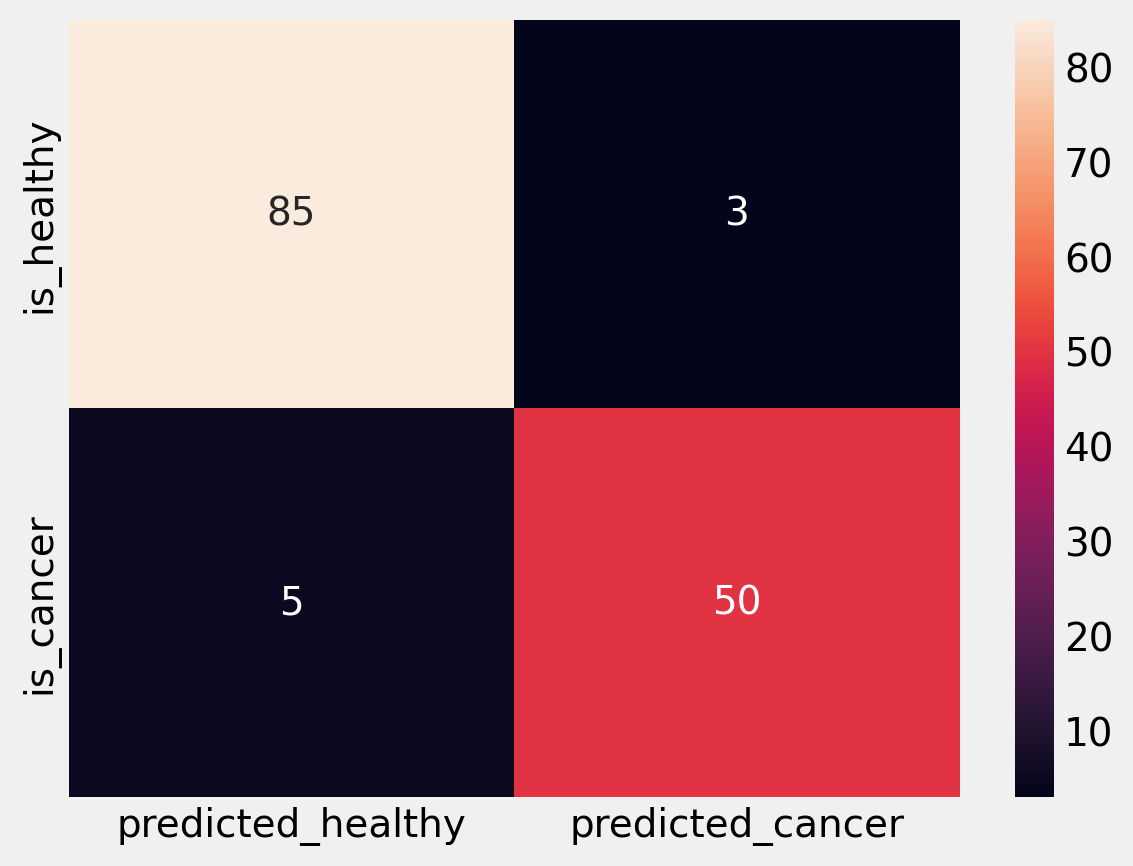

In [23]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
bayes_pred = bayes.predict(X_test)

bayes_confusion = confusion_df(metrics.confusion_matrix(y_test, bayes_pred))
bayes_accuracy = metrics.accuracy_score(y_test, bayes_pred)
bayes_classification_report = metrics.classification_report(y_test, bayes_pred)

print_model_metrics(bayes_confusion, bayes_accuracy, bayes_classification_report)
sns.heatmap(bayes_confusion,annot=True,fmt="d");


### 6 Gridsearch optimal parameters for all three models.

Is there any difference between accuracy score of Logistic Regression and SVM? Use grid search to find optimal parameter for both these models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

#### 6.1 Find Best Estimator For Logistic Regression

Find out how these parameters effect model. Find out the best estimator, score.

In [37]:
# Possible parameter values for the LogisticRegression model
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

# In grid search, cv = # of cross-validation folds
lr_gs = GridSearchCV(logreg, lr_params, cv=5, verbose = 1)


In [38]:
lr_gs.fit(X_train, y_train)
lr_gs.score(X_test, y_test)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


0.965034965034965

In [41]:
logreg_best = lr_gs.best_estimator_
logreg_best


LogisticRegression(C=100, max_iter=100000, solver='liblinear')


In [42]:
print(lr_gs.best_params_)
print(lr_gs.best_score_)

{'C': 100, 'penalty': 'l2'}
0.9507523939808481


#### 6.2 Find Best Estimator For SVM

Find out how these parameters effect model. Find out the best estimator, score.

In [48]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

svc_gs = GridSearchCV(SVC(probability=True), svc_params, cv=5, verbose=1)

In [49]:
# Perform grid search on the training set
svc_gs.fit(X_train, y_train)
# After grid search is complete, evaluate the best model on the test set
test_score = svc_gs.score(X_test, y_test)
print("Test set score of the best model:", test_score)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test set score of the best model: 0.9440559440559441


#### 6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

Find out which model performs better.

In [52]:
yhat_pp_lin = logreg.predict_proba(X_test)
yhat_pp_svc = svm.predict_proba(X_test)
yhat_pp_nb = bayes.predict_proba(X_test)

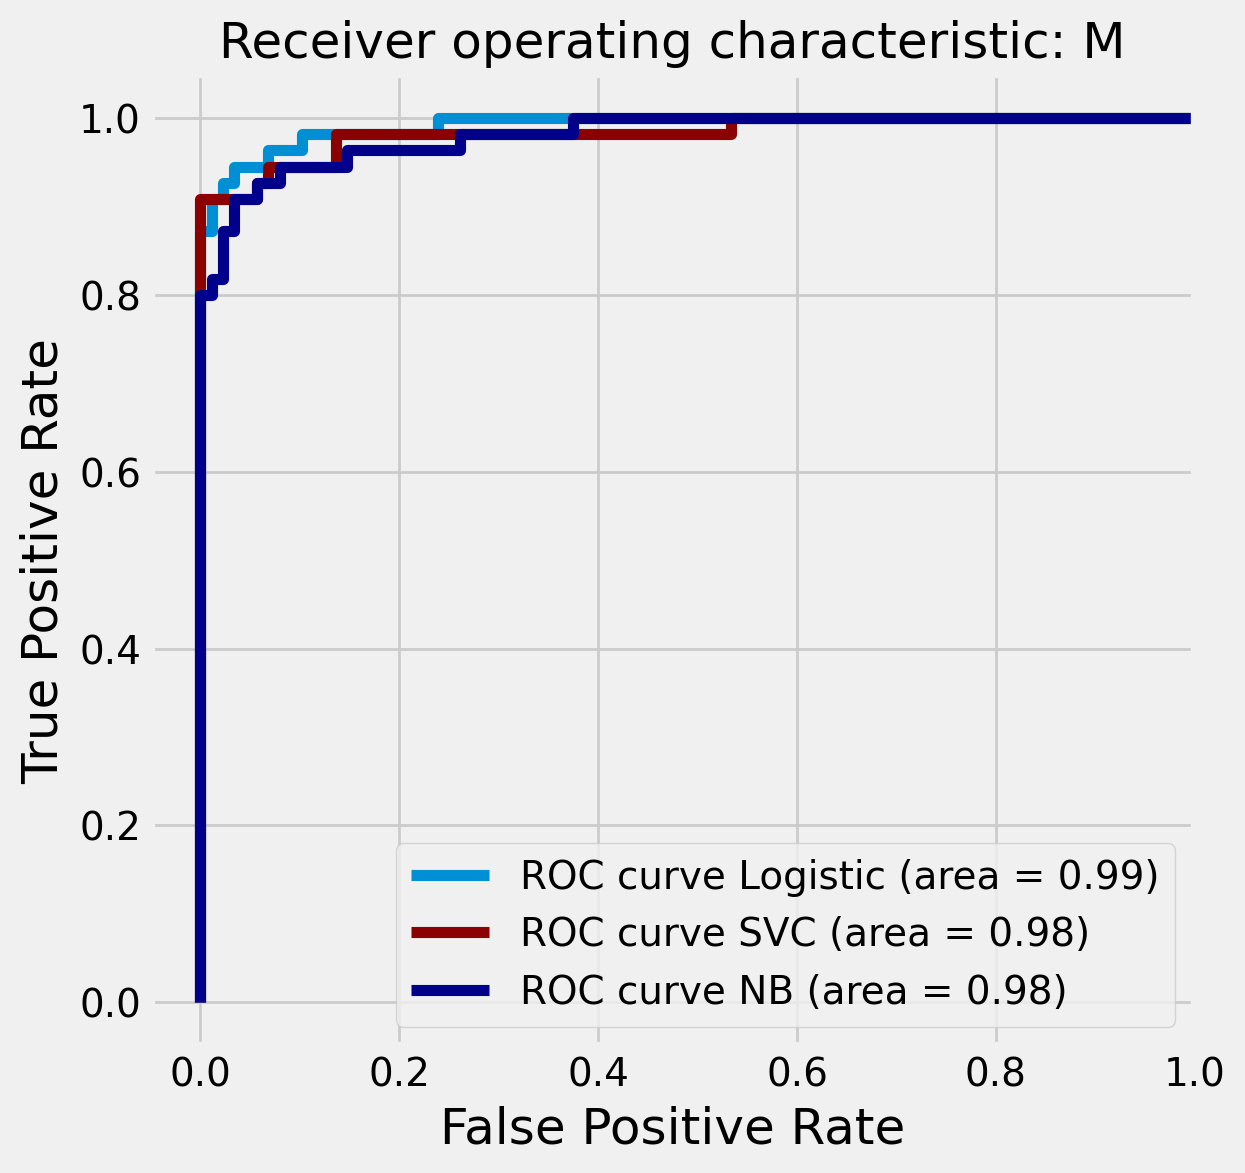

In [55]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test contains the true labels
fpr_lin, tpr_lin, _ = roc_curve(y_test, yhat_pp_lin[:,1])
fpr_svc, tpr_svc, _ = roc_curve(y_test, yhat_pp_svc[:,1])
fpr_nb, tpr_nb, _ = roc_curve(y_test, yhat_pp_nb[:,1])
plt.figure(figsize=[6,6])
plt.plot(fpr_lin, tpr_lin, label='ROC curve Logistic (area = %0.2f)' % auc(fpr_lin, tpr_lin), linewidth=4)
plt.plot(fpr_svc, tpr_svc, label='ROC curve SVC (area = %0.2f)' % auc(fpr_svc, tpr_svc), linewidth=4, color='darkred')
plt.plot(fpr_nb, tpr_nb, label='ROC curve NB (area = %0.2f)' % auc(fpr_nb, tpr_nb), linewidth=4, color='darkblue')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 7. [BONUS] Learning Curve

A learning curve compares the validation and training performance of an estimator for varying amounts of training data. If both the validation and training score converge to a value that is too low, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



